# COMP5318 - Machine Learning and Data Mining 

## Tutorial 3 - Linear regression and Gradient Decent

**Semester 2, 2019**

**Objectives:**
* To learn how to build a linear regression model from scratch
* To learn about Gradient decent
* To learn how to use pandas and numpy to preprocess data.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab3.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab3.ipynb" file
* Complete exercises in "lab3.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran

## 1. House Prices Dataset
**Dataset descriptions:**
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data/Lab3"))

['data_description.txt', 'test.csv', 'train.csv']


In [2]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('./data/Lab3/train.csv')
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### In this tutorial we only consider one feature the Living Area to predict the Sale Price with the expectation that the Price will increase when the Living Area increases.
However we can use more features like the number of bedroom....

In [3]:
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


Plot the dataset on firgure

1515.463698630137
-1.5611560750379769e-16


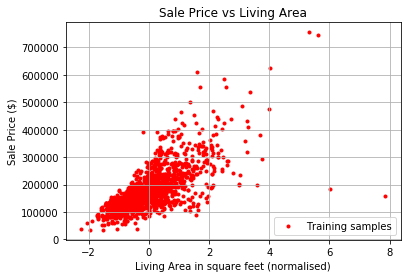

In [4]:
import matplotlib.pylab as pl
%matplotlib inline
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...

x = newData['GrLivArea']
y = newData['SalePrice']
print(np.mean(x))
# Todo: Normalize feature X:
x = ((x - np.mean(x))/np.std(x))
print(np.mean(x))
x = np.c_[np.ones(x.shape[0]), x] 
pl.scatter(x[:,1], y,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('Living Area in square feet (normalised)')
pl.ylabel('Sale Price ($)')
pl.legend(loc='lower right')
plt.title('Sale Price vs Living Area')
pl.grid()
pl.show()

### 2. Building Linear Regression model using Gradient Decent with sum square error

#### 2.1 Linear Model:
* input: $x \in R^D$ (covariates, predictors, features, etc)
* Output: $y \in R$ (responses, targets, outcomes, outputs, etc)
* Model: $f: x \to y$,with $f(x)=w_0+ \
\sum_{d=1}^{D}w_dx_d =w_0+w^T x.$

Minimize the Residual sum of squares:
$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$

#### 2.2 Gradient decent:
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla RSS(w) = X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla RSS(w)$

In [5]:
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        # Todo : Caculate Residual sum of squares error following notation on 2.1
        GradRss = np.dot(x.T,error)
        # Todo: Cacualte new weight update.
        w = w - eta* GradRss/n
        past_w.append(w)
        print(w)
        
    return past_w, past_loss

In [6]:
#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(2) #Pick some random values to start with
past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

[1809.9014634   563.03947521]
[3601.01440767 1120.16527773]
[5374.2162225  1671.71982223]
[7129.68601917 2217.75882128]
[8867.60111789 2758.33743034]
[10588.13706561  3293.51025331]
[12291.46765386  3823.33134805]
[13977.76493623  4347.85423184]
[15647.19924577  4867.13188679]
[17299.93921221  5381.2167652 ]
[18936.151779    5890.16079482]
[20556.00222011  6394.01538414]
[22159.65415681  6892.83142757]
[23747.26957415  7386.65931057]
[25319.00883731  7875.54891473]
[26875.03070784  8359.54962286]
[28415.49235967  8838.7103239 ]
[29940.54939498  9313.07941794]
[31450.35585993  9782.70482103]
[32945.06426023 10247.63397009]
[34424.82557654 10707.91382766]
[35889.78927968 11163.59088666]
[37340.10334578 11614.71117506]
[38775.91427123 12061.32026058]
[40197.36708742 12503.46325525]
[41604.60537545 12941.18481997]
[42997.7712806  13374.52916904]
[44377.0055267  13803.54007462]
[45742.44743034 14228.26087115]
[47094.23491494 14648.73445971]
[48432.50452469 15065.00331239]
[49757.39143835 15

[177293.93764699  55147.36080515]
[177330.21022943  55158.64339437]
[177366.12008604  55169.8131577 ]
[177401.67084408  55180.87122339]
[177436.86609454  55191.81870843]
[177471.7093925   55202.65671862]
[177506.20425748  55213.3863487 ]
[177540.35417381  55224.00868249]
[177574.16259098  55234.52479294]
[177607.63292397  55244.93574228]
[177640.76855363  55255.24258213]
[177673.572827    55265.44635358]
[177706.04905764  55275.54808732]
[177738.20052596  55285.54880372]
[177770.03047961  55295.44951295]
[177801.54213372  55305.25121509]
[177832.73867128  55314.95490022]
[177863.62324348  55324.56154849]
[177894.19896994  55334.07213027]
[177924.46893915  55343.48760624]
[177954.43620866  55352.80892745]
[177984.10380548  55362.03703545]
[178013.47472633  55371.17286237]
[178042.55193797  55380.21733102]
[178071.33837749  55389.17135498]
[178099.83695262  55398.0358387 ]
[178128.050542    55406.81167759]
[178155.98199548  55415.49975808]
[178183.63413443  55424.10095777]
[178211.009751

[180876.30496943  56261.65640321]
[180876.75387864  56261.79603645]
[180877.19829875  56261.93427336]
[180877.63827467  56262.0711279 ]
[180878.07385083  56262.20661389]
[180878.50507122  56262.34074502]
[180878.93197942  56262.47353485]
[180879.35461853  56262.60499677]
[180879.77303124  56262.73514407]
[180880.18725984  56262.86398991]
[180880.59734614  56262.99154728]
[180881.00333158  56263.11782908]
[180881.40525717  56263.24284806]
[180881.80316351  56263.36661685]
[180882.19709077  56263.48914795]
[180882.58707877  56263.61045375]
[180882.97316689  56263.73054648]
[180883.35539412  56263.84943829]
[180883.73379909  56263.96714118]
[180884.10842     56264.08366704]
[180884.4792947   56264.19902764]
[180884.84646066  56264.31323464]
[180885.20995496  56264.42629956]
[180885.56981431  56264.53823384]
[180885.92607507  56264.64904877]
[180886.27877323  56264.75875556]
[180886.6279444   56264.86736527]
[180886.97362386  56264.97488889]
[180887.31584652  56265.08133728]
[180887.654646

[180920.25895763  56275.32829421]
[180920.26832695  56275.33120855]
[180920.27760259  56275.33409373]
[180920.28678547  56275.33695007]
[180920.29587652  56275.33977784]
[180920.30487666  56275.34257733]
[180920.31378679  56275.34534883]
[180920.32260783  56275.34809261]
[180920.33134066  56275.35080896]
[180920.33998615  56275.35349814]
[180920.3485452   56275.35616043]
[180920.35701865  56275.3587961 ]
[180920.36540737  56275.36140541]
[180920.3737122   56275.36398863]
[180920.38193398  56275.36654602]
[180920.39007354  56275.36907783]
[180920.39813171  56275.37158432]
[180920.4061093   56275.37406575]
[180920.41400711  56275.37652237]
[180920.42182594  56275.37895442]
[180920.42956659  56275.38136214]
[180920.43722983  56275.38374579]
[180920.44481643  56275.38610561]
[180920.45232717  56275.38844182]
[180920.4597628   56275.39075468]
[180920.46712408  56275.3930444 ]
[180920.47441174  56275.39531123]
[180920.48162653  56275.39755539]
[180920.48876917  56275.39977711]
[180920.495840

[180921.18005616  56275.61480198]
[180921.18021451  56275.61485123]
[180921.18037126  56275.61489999]
[180921.18052646  56275.61494826]
[180921.1806801   56275.61499605]
[180921.1808322   56275.61504336]
[180921.18098278  56275.6150902 ]
[180921.18113186  56275.61513657]
[180921.18127944  56275.61518248]
[180921.18142555  56275.61522793]
[180921.1815702   56275.61527292]
[180921.1817134   56275.61531746]
[180921.18185517  56275.61536156]
[180921.18199553  56275.61540522]
[180921.18213447  56275.61544844]
[180921.18227203  56275.61549122]
[180921.18240822  56275.61553358]
[180921.18254304  56275.61557552]
[180921.18267651  56275.61561704]
[180921.18280865  56275.61565814]
[180921.18293947  56275.61569883]
[180921.18306898  56275.61573911]
[180921.18319719  56275.61577899]
[180921.18332413  56275.61581848]
[180921.18344979  56275.61585756]
[180921.18357419  56275.61589626]
[180921.18369736  56275.61593457]
[180921.18381929  56275.6159725 ]
[180921.18394     56275.61601004]
[180921.184059

[180921.19548227  56275.61960027]
[180921.19548635  56275.61960154]
[180921.19549039  56275.6196028 ]
[180921.19549439  56275.61960404]
[180921.19549835  56275.61960527]
[180921.19550227  56275.61960649]
[180921.19550616  56275.6196077 ]
[180921.19551     56275.61960889]
[180921.1955138   56275.61961008]
[180921.19551757  56275.61961125]
[180921.1955213   56275.61961241]
[180921.19552499  56275.61961356]
[180921.19552864  56275.61961469]
[180921.19553226  56275.61961582]
[180921.19553584  56275.61961693]
[180921.19553939  56275.61961804]
[180921.1955429   56275.61961913]
[180921.19554637  56275.61962021]
[180921.19554981  56275.61962128]
[180921.19555322  56275.61962234]


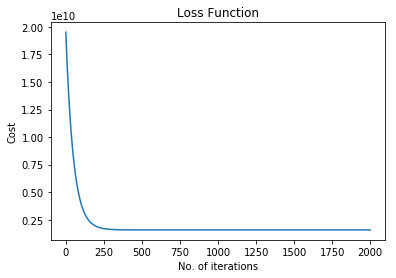

In [7]:
#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()

In [8]:
print(past_w[-1])

[180921.19555322  56275.61962234]


### 3. The changing of model through each interation

In [9]:
#Animation
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_w[i][1]*x + past_w[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (past_loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable. Trying to use pillow instead.



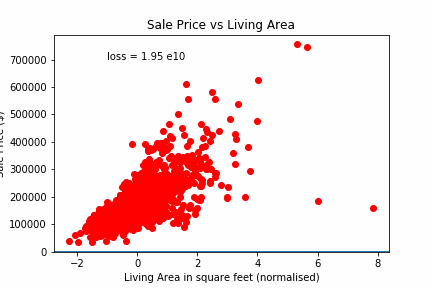

In [10]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 4: Using more features to predict the house price.

In [11]:
#For example using LotFrontage, and GrLivArea
dataNew = data[["GrLivArea","LotFrontage",'SalePrice']]

#remove null value
dataNew = dataNew[dataNew['GrLivArea'].notnull()]
dataNew = dataNew[dataNew['LotFrontage'].notnull()]

x = dataNew[["GrLivArea","LotFrontage"]]

x = ((x - np.mean(x))/np.std(x))
print(np.mean(x))
x = np.c_[np.ones(x.shape[0]), x] 

y = dataNew['SalePrice']

GrLivArea      1.636215e-17
LotFrontage   -2.745283e-16
dtype: float64


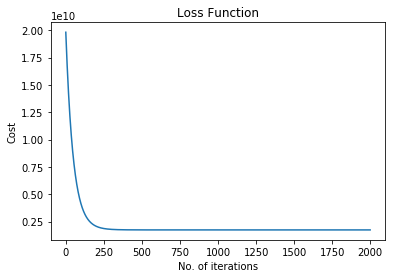

In [13]:
#Todo: 
    
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        # Todo : Caculate Residual sum of squares error following notation on 2.1
        GradRss = np.dot(x.T,error)
        # Todo: Cacualte new weight update.
        w = w - eta* GradRss/n
        past_w.append(w)
        
    return past_w, past_loss

#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(3) #Pick some random values to start with
past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()